<a href="https://colab.research.google.com/github/MarcusViniAraujo/Inteligencia-Artificial/blob/main/Apresentacao-disciplina/Agentes-implementacaoV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementação - Smart house**

A seguir, vamos apresentar a implementação de uma possível funcionalidade de uma *smart house*

Imagine que a implementação controle o estoque de papel higiênico da sua casa (república). O sistema mantém uma quantidade mínima de papel e tenta comprar os produtos a um preço baixo.

# Importar bibliotecas necessárias para executar o código


In [1]:
from random import *
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

# Definição do ambiente

Vamos armazenar no ambiente as seguintes informações:

*   Informação do dia
*   Preço do produto em cada um dos dias da série
*   Histórico de preços
*   Histórico de estoque
*   Histórico com a quantidade de produtos comprados

In [2]:
# Definicao da classe ambiente
class Ambiente():

  def __init__(self):
    # Ambiente explorado pelo agente de compra de papel higienico
    self.num_dias=0
    self.estoque=300 # Valor do estoque inicial
    self.historico_preco=[1.5]
    self.historico_consumo = []  # Guarda a quantidade consumida por dia

    self.consumidos = 0

    self.historico_estoque=[self.estoque]
    self.historico_qtde_comprados=[0]

    self.historico_estoque_movel = [self.estoque]
    self.historico_qtde_comprados_movel = [0]

  def percebe_preco_atual(self):
    return self.historico_preco[len(self.historico_preco)-1]

  def percebe_estoque(self):
    return self.historico_estoque[len(self.historico_estoque)-1]

  def percebe_estoque_mediaMovel(self):
    return self.historico_estoque_movel[len(self.historico_estoque_movel)-1]

  def percebe_gasto(self):
    self.consumidos = randint(200,400)
    return self.consumidos

  def run(self, dic_acoes):
    '''Realizar alteracoes no ambiente:
       Definir, aleatoriamente, uma quantidade de produtos consumidos
       Atualizar o historico do preco atual e do estoque.
       Essas informacoes serao utilizadas pelo agente para decidir a compra ou nao de produtos
    '''
    self.historico_consumo.append(self.consumidos)

    estoque_atual = self.historico_estoque[len(self.historico_estoque)-1] - self.consumidos + dic_acoes["comprar"]
    self.historico_estoque.append(estoque_atual)
    self.historico_qtde_comprados.append(dic_acoes["comprar"])

    estoque_atual_movel = self.historico_estoque_movel[len(self.historico_estoque_movel)-1] - self.consumidos + dic_acoes["comprar_movel"]
    self.historico_estoque_movel.append(estoque_atual_movel)
    self.historico_qtde_comprados_movel.append(dic_acoes["comprar_movel"])

    # Informando valor do produto no periodo (Atualizacao para o proximo dia)
    valor = 0.5 + (2 - 0.5) * random() # novo valor do produto. random() gera valores entre [0,1]
    self.historico_preco.append(valor)


# Definição do agente

O agente vai armazenar informações sobre:
*   Ambiente (Composição de classes)
*   Valor médio das compras
*   Informação do último valor do produto
*   Informação sobre o estoque atual de produtos na casa

In [5]:
# Definição da classe agente

class Agente():

  def __init__(self, ambiente):
    self.num_dias = 1
    self.ambiente= ambiente
    self.estoque= ambiente.percebe_estoque()
    self.estoque_movel = self.ambiente.percebe_estoque_mediaMovel()
    self.total_gasto = self.total_gasto_movel = 0
    self.preco_atual = self.media = self.media_movel = ambiente.percebe_preco_atual()
    self.preco_atual = self.media = ambiente.percebe_preco_atual()
    self.auxMedia = deque(maxlen=5)  # Adicionando a fila para média móvel
    self.auxMedia.append(self.preco_atual)
    self.consumidos = 0

  def executa_agente(self, qtde_dias=20):

    for i in range(qtde_dias):
      # O agente percebe o estado do ambiente
      self.estoque= self.ambiente.percebe_estoque()
      self.preco_atual= self.ambiente.percebe_preco_atual()
      self.consumidos = self.ambiente.percebe_gasto()
      self.estoque_movel = self.ambiente.percebe_estoque_mediaMovel()



      '''
        Controlador do agente:
        - Define a regra para compra de produtos
      '''

      if self.preco_atual < self.media:
        if self.estoque == 500:
          compra= self.consumidos
        elif (500 - self.estoque) >= (400 - self.consumidos):
          compra= 400
        else:
          compra= (500 - self.estoque) + (400 - self.consumidos)

      elif self.estoque <= 200:
          compra= self.consumidos

      else:
        if self.estoque > 400 or self.estoque > self.consumidos:
          compra= 0

        elif self.estoque < self.consumidos:
          compra= (self.consumidos - self.estoque) + 200


      if self.preco_atual < self.media_movel:
        if self.estoque_movel == 500:
          compra_movel= self.consumidos
        elif (500 - self.estoque_movel) >= (400 - self.consumidos):
          compra_movel= 400
        else:
          compra_movel= (500 - self.estoque_movel) + (400 - self.consumidos)

      elif self.estoque_movel <= 200:
          compra_movel= self.consumidos

      else:
        if self.estoque_movel > 400 or self.estoque_movel > self.consumidos:
          compra_movel= 0

        elif self.estoque_movel < self.consumidos:
          compra_movel= (self.consumidos - self.estoque_movel) + 200

      # Fim do controlador
      self.total_gasto += self.preco_atual*compra
      self.total_gasto_movel += self.preco_atual * compra_movel

      # O agente aplica modificacoes ao ambiente)
      self.ambiente.run({"comprar": compra, "comprar_movel": compra_movel})

      self.num_dias+=1
      self.media = (self.media*(self.num_dias-1) + self.preco_atual)/self.num_dias
      self.auxMedia.append(self.preco_atual)
      self.media_movel = sum(self.auxMedia) / len(self.auxMedia)

      if self.estoque <= 0 or self.estoque_movel <= 0:
        print("Acabou a energia")
        return

# Definir classe para impressão dos resultados


In [4]:
class Imprime():
    @staticmethod
    def imprime_resultado(agente):
        historico_dias = np.linspace(0, agente.num_dias - 1, agente.num_dias - 1)
        historico_dias_estoque = np.linspace(0, agente.num_dias, agente.num_dias)  # o estoque tem 1 dia a mais

        # Remover o último preço pois ele não foi usado
        agente.ambiente.historico_preco.pop()

        # 1. Histórico de preços
        plt.figure(figsize=(10, 4))
        plt.plot(historico_dias, agente.ambiente.historico_preco, 'b-', label='Preço')
        plt.title('Histórico de Preços')
        plt.xlabel('Dia')
        plt.ylabel('Preço (R$)')
        plt.legend()
        plt.grid(True)
        plt.show()

        # 2. Histórico de consumo
        plt.figure(figsize=(10, 4))
        plt.plot(historico_dias, agente.ambiente.historico_consumo, 'r-', label='Consumo diário')
        plt.title('Histórico de Consumo')
        plt.xlabel('Dia')
        plt.ylabel('Quantidade consumida')
        plt.legend()
        plt.grid(True)
        plt.show()

        # 3. Histórico do estoque (simples e móvel)
        plt.figure(figsize=(10, 4))
        plt.plot(historico_dias_estoque, agente.ambiente.historico_estoque, 'r--', label='Média simples')
        plt.plot(historico_dias_estoque, agente.ambiente.historico_estoque_movel, 'b--', label='Média móvel')
        plt.axhline(y=200, color='black', linestyle='--', linewidth=1.5, label='Nível crítico')
        plt.ylim(0, 600)
        plt.title('Histórico do Estoque')
        plt.xlabel('Dia')
        plt.ylabel('Estoque')
        plt.legend()
        plt.grid(True)
        plt.show()

        # 4. Custos totais
        print(f'\nCustos de cada estratégia:')
        print(f'Custo total com média simples: R$ {agente.total_gasto:.2f}')
        print(f'Custo total com média móvel : R$ {agente.total_gasto_movel:.2f}')



# Execução do programa

Por um determinado número de iterações, vamos gerar valores aleatórios para o preco do papel higienico e a quantidade de produto consumido

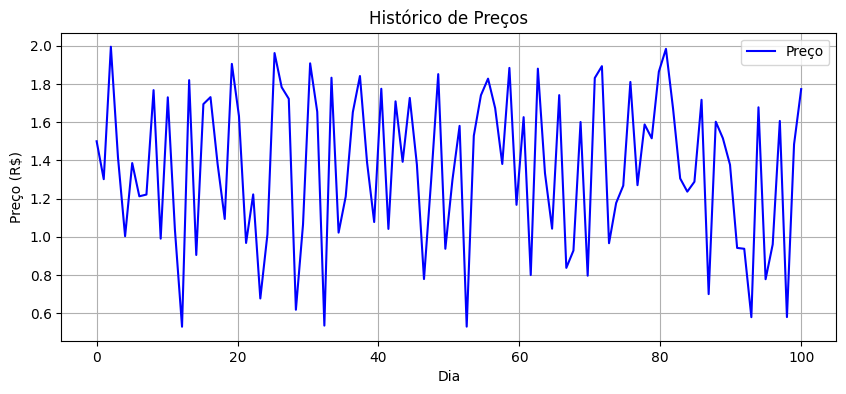

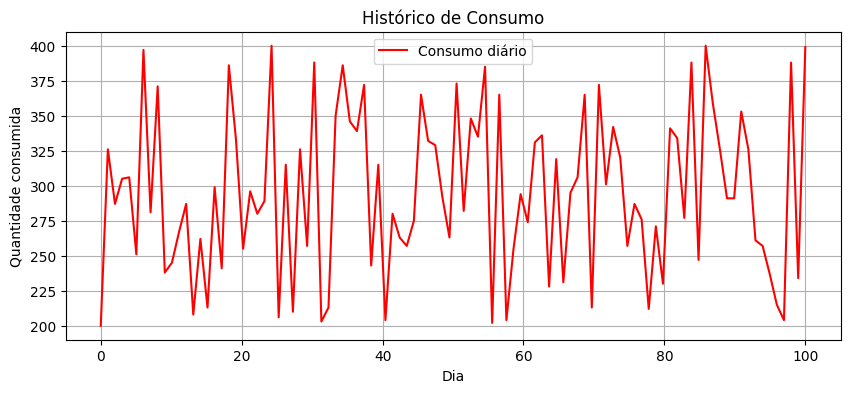

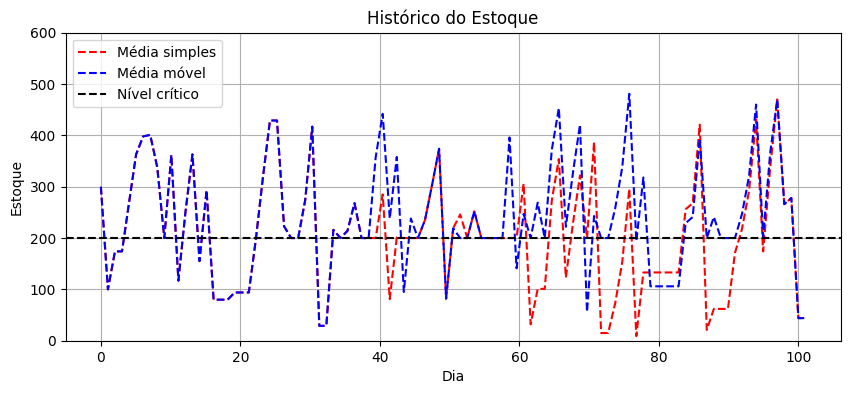


Custos de cada estratégia:
Custo total com média simples: R$ 36337.29
Custo total com média móvel : R$ 36270.75


In [15]:
ambiente = Ambiente()

agente = Agente(ambiente)

agente.executa_agente(qtde_dias=100)

Imprime.imprime_resultado(agente)